q1_get_cifar100_train_test(srn): Takes a 5 digit integer, which is your SR number as input.
 Please use your SR number. Theoutput is a 2-tuple: (train_data,test_data) where each data is
 a list of [’features’,’labels’] ,i.e for x in train_data, x[0]=features & x[1]=labels. The
 features and labels are numpy array of shape (N,432) and (N,) respectively.

In [1]:
import oracle
import numpy as np
import matplotlib.pyplot as plt 

# res = oracle.q1_get_cifar100_train_test(23607)

In [ ]:
# train = res[0]
# test= res[1]

In [ ]:
# train_data = []
# train_labels = []
# for i in range(len(train)):
#     train_data.append(train[i][0])
#     train_labels.append(train[i][1])

# test_data = []
# test_labels = []
# for i in range(len(test)):
#     test_data.append(test[i][0])
#     test_labels.append(test[i][1])

# train_data = np.array(train_data)
# train_labels = np.array(train_labels)
# test_data = np.array(test_data)
# test_labels = np.array(test_labels)

In [2]:
train_data = np.load('train_data.npy')
train_labels = np.load('train_labels.npy')
test_data = np.load('test_data.npy')
test_labels = np.load('test_labels.npy')

# Perceptron:

In [3]:
R = np.max(np.linalg.norm(train_data, axis=1))

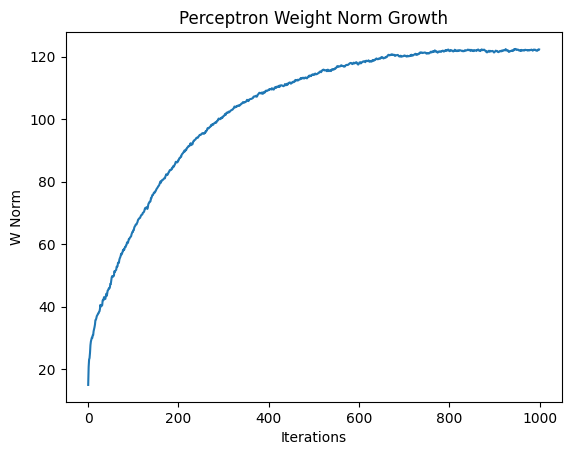

In [4]:
# Perceptron function
def perceptron(X, y, max_iter=1000):
    w = np.zeros(X.shape[1])
    norm_history = []
    mistakes = 0
    
    for _ in range(max_iter):
        converged = True
        for i in range(len(X)):
            if y[i] * np.dot(w, X[i]) <= 0:
                w += y[i] * X[i]
                mistakes += 1
                converged = False
        norm_history.append(np.linalg.norm(w))
        if converged:
            print('Converged after', _, 'iterations')
            break
    
    return w, mistakes, norm_history

# Run perceptron
w, mistakes, norm_history = perceptron(train_data, train_labels)

# Plotting the weight vector norm growth
plt.plot(norm_history)
plt.xlabel('Iterations')
plt.ylabel('W Norm')
plt.title('Perceptron Weight Norm Growth')
plt.show()

In [5]:
X = train_data
y = train_labels

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import numpy as np

def FLD_plot(X, y):
    # Assuming X is your dataset (N samples × 27 features)
    # y contains the labels (+1 and -1)

    # Apply Fisher's LDA to reduce to 1D
    lda = LDA(n_components=1)
    X_lda = lda.fit_transform(X, y)

    # Plotting the Fisher LDA reduced dataset in 1D
    plt.scatter(X_lda[y == 1], np.zeros_like(X_lda[y == 1]), color='blue', label='Class +1')
    plt.scatter(X_lda[y == -1], np.zeros_like(X_lda[y == -1]), color='red', label='Class -1')

    # Plotting the decision boundary
    plt.axvline(0, color='green', linestyle='--', label='Fisher Decision Boundary')

    plt.xlabel('LDA Dimension 1')
    plt.ylabel('Projection')
    plt.legend()
    plt.title('Fisher LDA with Decision Boundary in 1D')
    plt.show()


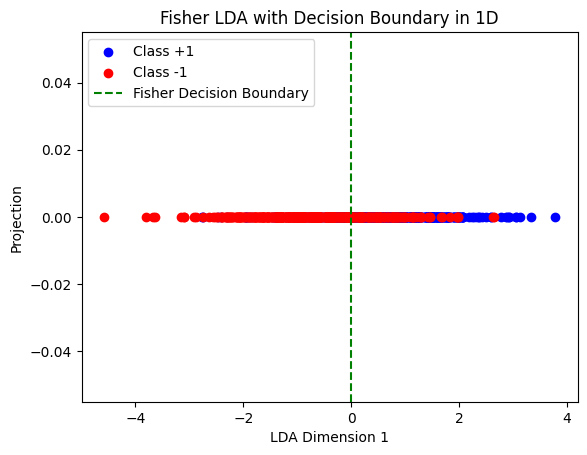

In [14]:
FLD_plot(X, y)

In [7]:
def mistakes_perceptron(w, X, y):
    mistakes = 0
    for i in range(len(X)):
        if y[i] * np.dot(w, X[i]) <= 0:
            mistakes += 1
    return mistakes


In [17]:
# now we plot misclassification rate for different values of max_iter
max_iters = [100, 200, 500, 1000, 2000, 5000, 7500, 10000]
mistakes_train = []
mistakes_test = []
for max_iter in max_iters:
    w, _, _ = perceptron(train_data, train_labels, max_iter)
    mistakes_train.append(mistakes_perceptron(w, train_data, train_labels))
    mistakes_test.append(mistakes_perceptron(w, test_data, test_labels))


In [18]:
print(mistakes_train)
print(mistakes_test)

[354, 268, 296, 350, 388, 337, 405, 285]
[65, 42, 53, 69, 80, 66, 81, 55]


In [19]:
mistakes_train_ = mistakes_train.copy()
mistakes_test_ = mistakes_test.copy()
max_iters_ = max_iters.copy()

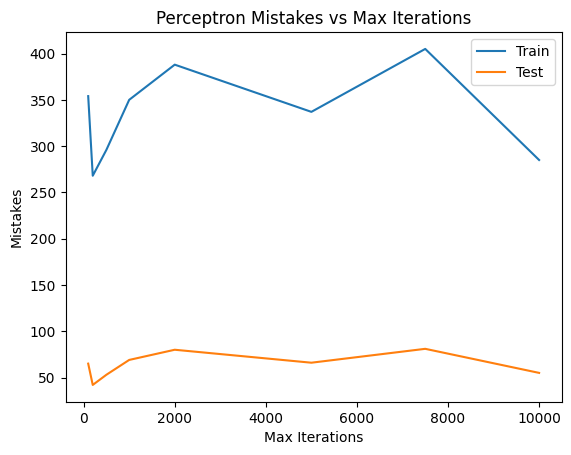

In [20]:
# # do in log scale
# mistakes_train_ = [np.log(m) for m in mistakes_train]
# mistakes_test_ = [np.log(m) for m in mistakes_test]
# max_iters_ = [np.log(m) for m in max_iters]

# Plotting the mistakes vs max_iter
plt.plot(max_iters_, mistakes_train_, label='Train')
plt.plot(max_iters_, mistakes_test_, label='Test')
plt.xlabel('Max Iterations')
plt.ylabel('Mistakes')
plt.title('Perceptron Mistakes vs Max Iterations')
plt.legend()
plt.show()

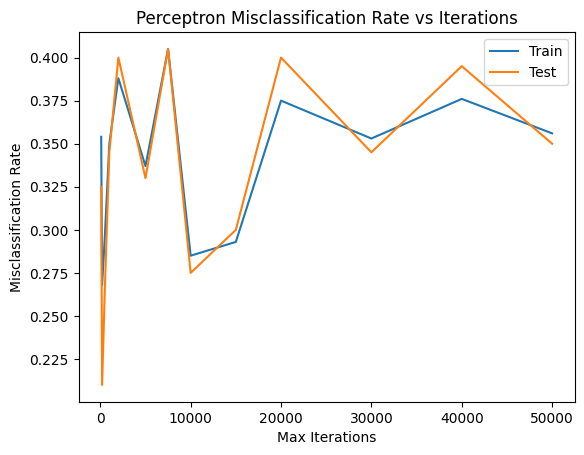

In [21]:
mistakes_train__ = [354, 268, 296, 350, 388, 337, 405, 285, 293, 375, 353, 376, 356]
mistakes_test__=[65, 42, 53, 69, 80, 66, 81, 55, 60, 80, 69, 79, 70]
max_iters__ = [100, 200, 500, 1000, 2000, 5000, 7500, 10000, 15000, 20000, 30000, 40000, 50000]
# Plotting the misclassification rate for different values of max_iter
len_train = len(train_data)
len_test = len(test_data)
mistakes_train__ = [m/len_train for m in mistakes_train__]
mistakes_test__ = [m/len_test for m in mistakes_test__]

plt.plot(max_iters__, mistakes_train__, label='Train')
plt.plot(max_iters__, mistakes_test__, label='Test')
plt.xlabel('Max Iterations')
plt.ylabel('Misclassification Rate')
plt.title('Perceptron Misclassification Rate vs Iterations')
plt.legend()
plt.show()

Since mistakes increase after each iteration, and norm of W somewhat stabilizes after 20k iterations, but the algorithm doesn't converge and seeing FLD plot, we can say that the data is not linearly separable. Hence, we can't use Perceptron for this problem.

In [22]:
import cvxopt

In [6]:
def mistakes_svm(w, b, X, y):
    mistakes = 0
    for i in range(len(X)):
        if y[i] * (np.dot(w, X[i]) + b) <= 0:
            mistakes += 1
    return mistakes

## Linear Kernel SVM:

In [8]:
X = train_data
y = train_labels

In [9]:
# Primal SVM
import numpy as np
from cvxopt import matrix, solvers

C = 20
n_samples, n_features = X.shape

# Primal SVM matrices
P = matrix(np.block([
    [np.eye(n_features), np.zeros((n_features, n_samples + 1))],
    [np.zeros((n_samples + 1, n_features + n_samples + 1))]
]))

q = matrix(np.hstack([np.zeros(n_features), np.zeros(1), C * np.ones(n_samples)]))

# Inequality constraints: y_i(w . x_i + b) >= 1 - ξ_i
G_top = np.hstack([-y[:, np.newaxis] * X, -y[:, np.newaxis], -np.eye(n_samples)])
G_bottom = np.hstack([np.zeros((n_samples, n_features)), np.zeros((n_samples, 1)), -np.eye(n_samples)])
G = matrix(np.vstack([G_top, G_bottom]))
h = matrix(np.hstack([-np.ones(n_samples), np.zeros(n_samples)]))

solvers.options['show_progress'] = False
sol = solvers.qp(P, q, G, h)

w = np.array(sol['x'][:n_features]).flatten()
b = sol['x'][n_features]


In [10]:
print('Primal SVM')
print(mistakes_svm(w, b, train_data, train_labels))
print(mistakes_svm(w, b, test_data, test_labels))

Primal SVM
227
40


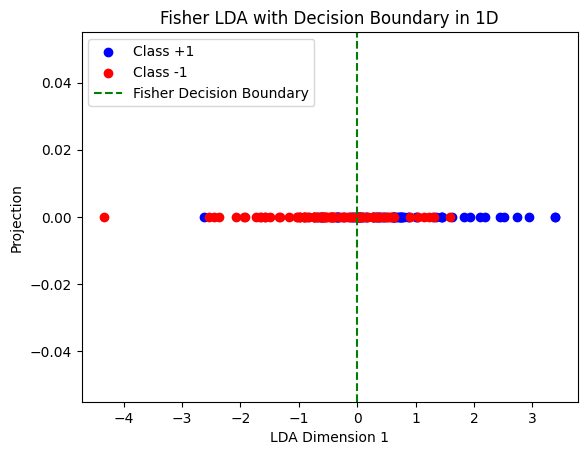

In [14]:
correct_idx = []
for i in range(len(test_data)):
    if test_labels[i] * (np.dot(w, test_data[i]) + b) > 0+1e-5:
        correct_idx.append(i)
correct_train = []
for i in correct_idx:
    correct_train.append(test_data[i])
coreect_train = np.array(correct_train)
correct_train_labels = []
for i in correct_idx:
    correct_train_labels.append(train_labels[i])
correct_train_labels = np.array(correct_train_labels)
FLD_plot(correct_train, correct_train_labels)


In [24]:
#DUAL SVM
import numpy as np
from cvxopt import matrix, solvers

# Assume X is your feature matrix of shape (n_samples, n_features)
# y is the label vector of shape (n_samples,)
# C is the regularization parameter

C = 20
n_samples, n_features = X.shape

# Kernel matrix for linear SVM (X @ X.T)
K = np.dot(X, X.T) * np.outer(y, y)

# Dual form matrices
P_dual = matrix(K)
q_dual = matrix(-np.ones(n_samples))

G_dual = matrix(np.vstack([-np.eye(n_samples), np.eye(n_samples)]))
h_dual = matrix(np.hstack([np.zeros(n_samples), C * np.ones(n_samples)]))

A_dual = matrix(y.reshape(1, -1), (1, n_samples), 'd')
b_dual = matrix(0.0)

solvers.options['show_progress'] = False
sol = solvers.qp(P_dual, q_dual, G_dual, h_dual, A_dual, b_dual)

# Extract the Lagrange multipliers
alpha = np.ravel(sol['x'])

# Get support vectors
sv = alpha > 1e-5
ind = np.arange(len(alpha))[sv]
alpha_sv = alpha[sv]
X_sv = X[sv]
y_sv = y[sv]

# Compute weights w and bias b
w = np.sum(alpha_sv[:, np.newaxis] * y_sv[:, np.newaxis] * X_sv, axis=0)
b = np.mean(y_sv - np.dot(X_sv, w))



In [25]:
print('Dual SVM')
print(mistakes_svm(w, b, train_data, train_labels))
print(mistakes_svm(w, b, test_data, test_labels))

Dual SVM
232
34


In [45]:
mistakes_idx = []
for i in range(len(train_data)):
    if train_labels[i] * np.dot(w, train_data[i]) <= 0:
        mistakes_idx.append(i)

In [48]:
# save in file inseparable_23607.csv
with open('inseparable_23607.csv', 'w') as f:
    for idx in mistakes_idx:
        f.write(str(idx) + ',')

C=0.1, Primal Time: 1.8242s, Dual Time: 1.7066s
C=1, Primal Time: 2.0232s, Dual Time: 1.8078s
C=10, Primal Time: 1.9438s, Dual Time: 1.8205s
C=20, Primal Time: 1.9472s, Dual Time: 1.8466s
C=30, Primal Time: 1.9961s, Dual Time: 1.9180s
C=50, Primal Time: 1.8907s, Dual Time: 1.7220s
C=70, Primal Time: 1.7664s, Dual Time: 1.6631s
C=100, Primal Time: 1.8814s, Dual Time: 1.8018s
C=200, Primal Time: 1.8766s, Dual Time: 1.7341s
C=300, Primal Time: 1.8367s, Dual Time: 1.8365s
C=400, Primal Time: 1.8924s, Dual Time: 1.8450s
C=500, Primal Time: 1.9386s, Dual Time: 1.8165s
C=1000, Primal Time: 1.9492s, Dual Time: 1.7995s


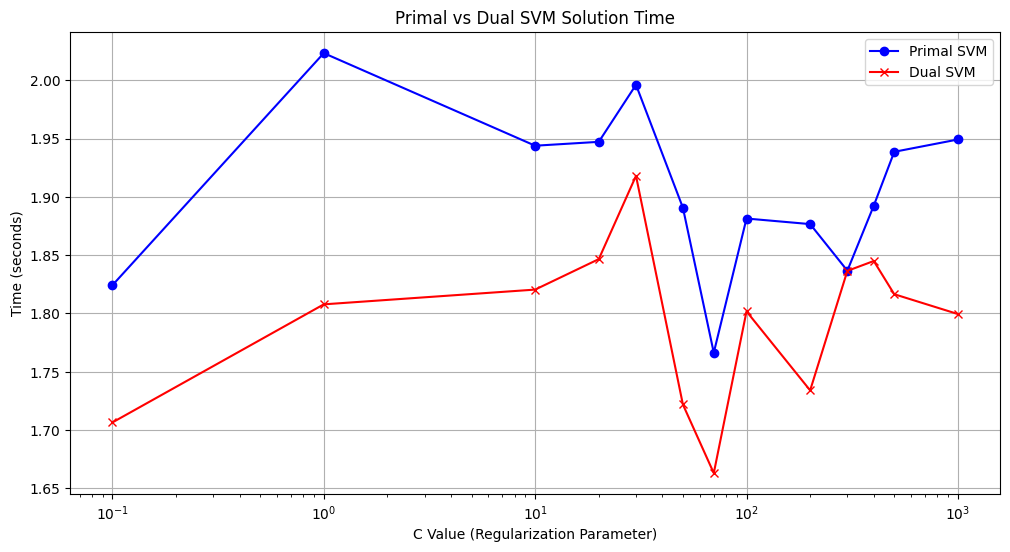

In [ ]:
# Plotting time comparison
import numpy as np
import time
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

# Generate random data (1000 samples, 27 features)
np.random.seed(42)
n_samples, n_features = 1000, 27
X = np.random.randn(n_samples, n_features)
y = np.random.choice([-1, 1], size=n_samples)

# Values of C to test
C_values = [0.1, 1, 10, 20, 30, 50, 70, 100, 200, 300, 400, 500, 1000]

primal_times = []
dual_times = []

for C in C_values:
    
    # ------------------ PRIMAL SVM ------------------
    start = time.time()

    # Primal matrices
    P = matrix(np.block([
        [np.eye(n_features), np.zeros((n_features, n_samples + 1))],
        [np.zeros((n_samples + 1, n_features + n_samples + 1))]
    ]))
    
    q = matrix(np.hstack([np.zeros(n_features), np.zeros(1), C * np.ones(n_samples)]))

    # Inequality constraints
    G_top = np.hstack([-y[:, np.newaxis] * X, -y[:, np.newaxis], -np.eye(n_samples)])
    G_bottom = np.hstack([np.zeros((n_samples, n_features)), np.zeros((n_samples, 1)), -np.eye(n_samples)])
    G = matrix(np.vstack([G_top, G_bottom]))
    h = matrix(np.hstack([-np.ones(n_samples), np.zeros(n_samples)]))

    solvers.options['show_progress'] = False
    sol = solvers.qp(P, q, G, h)

    primal_time = time.time() - start
    primal_times.append(primal_time)

    # ------------------ DUAL SVM ------------------
    start = time.time()

    # Dual matrices
    K = np.dot(X, X.T) * np.outer(y, y)
    
    P_dual = matrix(K)
    q_dual = matrix(-np.ones(n_samples))
    
    G_dual = matrix(np.vstack([-np.eye(n_samples), np.eye(n_samples)]))
    h_dual = matrix(np.hstack([np.zeros(n_samples), C * np.ones(n_samples)]))
    
    A_dual = matrix(y.reshape(1, -1), (1, n_samples), 'd')
    b_dual = matrix(0.0)

    sol = solvers.qp(P_dual, q_dual, G_dual, h_dual, A_dual, b_dual)

    dual_time = time.time() - start
    dual_times.append(dual_time)

    print(f"C={C}, Primal Time: {primal_time:.4f}s, Dual Time: {dual_time:.4f}s")

# ------------------ PLOTTING ------------------
plt.figure(figsize=(12, 6))
plt.plot(C_values, primal_times, label="Primal SVM", marker='o', color='blue')
plt.plot(C_values, dual_times, label="Dual SVM", marker='x', color='red')

plt.xlabel("C Value (Regularization Parameter)")
plt.ylabel("Time (seconds)")
plt.title("Primal vs Dual SVM Solution Time")
plt.xscale("log")
plt.grid(True)
plt.legend()
plt.show()


In [22]:
import numpy as np
from cvxopt import matrix, solvers

C = 20
# C = 1
# Compute the linear kernel
K = np.dot(X, X.T) * np.outer(y, y)

# cvxopt parameters for the dual problem
P = matrix(K)  # Quadratic term
q = matrix(-np.ones(X.shape[0]))  # Linear term
G = matrix(np.vstack((-np.eye(X.shape[0]), np.eye(X.shape[0]))))  # Inequality constraints
h = matrix(np.hstack((np.zeros(X.shape[0]), np.ones(X.shape[0]) * C)))  # Upper and lower bounds
A = matrix(y.reshape(1, -1).astype(float))
b = matrix(np.zeros(1))

solvers.options['show_progress'] = False

# Solve the dual SVM
sol = solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x']).flatten()

# Identify support vectors (0 < alpha < C)
sv = (alphas > 1e-5) & (alphas < C)
print("number of support vectors:", np.sum(sv))

# Get weight vector and bias
w = np.sum(alphas[:, np.newaxis] * y[:, np.newaxis] * X, axis=0)
support_vector_idx = np.where(sv)[0][0]
b = y[support_vector_idx] - np.dot(w, X[support_vector_idx])



number of support vectors: 590


In [26]:
mistakes = mistakes_svm(w, b, X, y)
print("misclassified indices", mistakes)
print("test mistakes", mistakes_svm(w, b, test_data, test_labels))

misclassified indices 232
test mistakes 34


In [47]:
# remove the sv from the data
ls_X = np.delete(X, np.where(sv), axis=0)
ls_y = np.delete(y, np.where(sv))

Converged after 13 iterations
Mistakes after removing sv from train: 0
Test Mistakes 40
Original train mistakes: 264


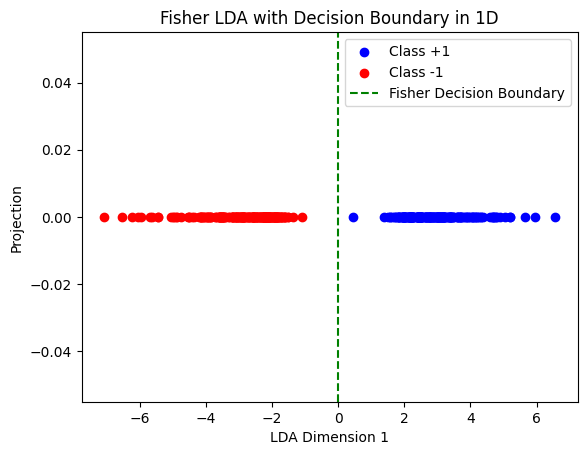

In [48]:
# train the perceptron on the remaining data
w, mistakes, norm_history = perceptron(ls_X, ls_y, max_iter=20)
# print(f"Weight vector: {w}")
mistakes = mistakes_perceptron(w, ls_X, ls_y)
print(f"Mistakes after removing sv from train: {mistakes}")
print("Test Mistakes",mistakes_perceptron(w, test_data, test_labels))
print("Original train mistakes:",mistakes_perceptron(w, train_data, train_labels))
FLD_plot(ls_X, ls_y)

## Gaussian Kernel SVM:

In [5]:
X = train_data
y = train_labels

In [12]:
import numpy as np
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Hyperparameters
Cs = [1,10,20, 30, 40, 50, 60, 70, 80, 90, 100]
C = 60  # Regularization parameter
gamma = 0.1  # RBF kernel width

num_support_vectors = []
# RBF kernel function
def rbf_kernel(X1, X2, gamma):
    sq_dists = np.sum(X1**2, axis=1)[:, np.newaxis] + np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
    return np.exp(-gamma * sq_dists)

# Compute the RBF kernel matrix
K = rbf_kernel(X, X, gamma)
K = np.outer(y, y) * K  # Apply the labels to the kernel matrix

# cvxopt parameters for the dual problem
P = matrix(K)
q = matrix(-np.ones(X.shape[0]))
G = matrix(np.vstack((-np.eye(X.shape[0]), np.eye(X.shape[0]))))
h = matrix(np.hstack((np.zeros(X.shape[0]), np.ones(X.shape[0]) * C)))
A = matrix(y.reshape(1, -1).astype(float))
b = matrix(np.zeros(1))

# Suppress solver output
solvers.options['show_progress'] = False

# Solve the SVM dual problem
sol = solvers.qp(P, q, G, h, A, b)

# Extract the Lagrange multipliers
alphas = np.ravel(sol['x'])

# Identify support vectors
sv = (alphas > 1e-5) & (alphas < C)
print(f"Number of support vectors: {np.sum(sv)} |", "C:", C)
num_support_vectors.append(np.sum(sv))

# Compute the weight vector and bias
w = np.sum(alphas[:, np.newaxis] * y[:, np.newaxis] * X, axis=0)
support_vector_idx = np.where(sv)[0][0]

# Compute the bias term
b = y[support_vector_idx] - np.sum(alphas * y * rbf_kernel(X, X[support_vector_idx:support_vector_idx+1], gamma))


Number of support vectors: 604 | C: 60


In [13]:
# we store indices of the train data which are being misclassified
misclassified_indices = []
for i in range(len(X)):
    if y[i] * (np.dot(w, X[i]) + b) <= 0:
        misclassified_indices.append(i)


450

In [14]:
misclassified_indices = np.array(misclassified_indices)
print("Number of misclassified points:", len(misclassified_indices))
print("Number of support vectors:", np.sum(sv))
ls_X = np.delete(X, np.where(sv), axis=0)
ls_y = np.delete(y, np.where(sv))

Number of misclassified points: 450
Number of support vectors: 604


In [15]:
print("Test Mistakes",mistakes_svm(w, b, test_data, test_labels))

Test Mistakes 93


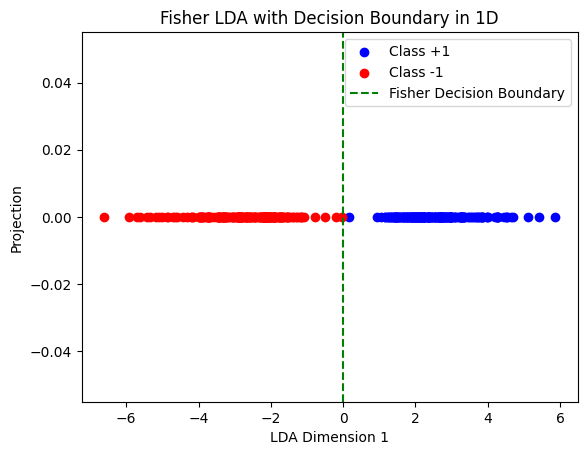

In [111]:
FLD_plot(ls_X, ls_y)

In [112]:
w, mistakes, norm_history = perceptron(ls_X, ls_y, max_iter=20)
mistakes = mistakes_perceptron(w, ls_X, ls_y)
print(f"Mistakes after removing sv from train: {mistakes}")
print("Test Mistakes",mistakes_perceptron(w, test_data, test_labels))
print("Original train mistakes:",mistakes_perceptron(w, train_data, train_labels))

Converged after 18 iterations
Mistakes after removing sv from train: 0
Test Mistakes 40
Original train mistakes: 256


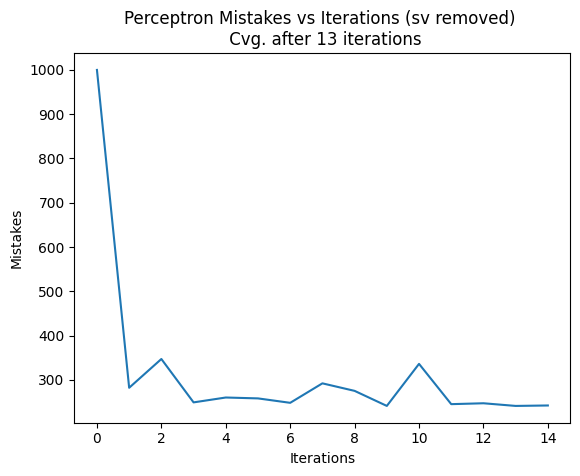

In [ ]:
misclassifications = []
for i in range(15):
    w, _, _ = perceptron(ls_X, ls_y, max_iter=i)
    mistakes = mistakes_perceptron(w, train_data, train_labels)
    misclassifications.append(mistakes)

plt.plot(misclassifications)
plt.xlabel('Iterations')
plt.ylabel('Mistakes')
plt.title('Perceptron Mistakes vs Iterations (sv removed) \n Cvg. after 13 iterations')
plt.show()




In [50]:
misclassified_indices = []
with open ('inseparable_23607.csv', 'r') as f:
    for line in f:
        misclassified_indices = line.split(',')
    
# remove misclassified indices from the train data
misclassified_indices = np.array([int(idx) for idx in misclassified_indices if idx != ''])
ls_X = np.delete(train_data, misclassified_indices, axis=0)
ls_y = np.delete(train_labels, misclassified_indices)

w,_, _ = perceptron(ls_X, ls_y, max_iter=1000)
mistakes = mistakes_perceptron(w, test_data, test_labels)
print(f"Mistakes after removing misclassified points from train: {mistakes}")

Converged after 875 iterations
Mistakes after removing misclassified points from train: 36


Converged after 875 iterations


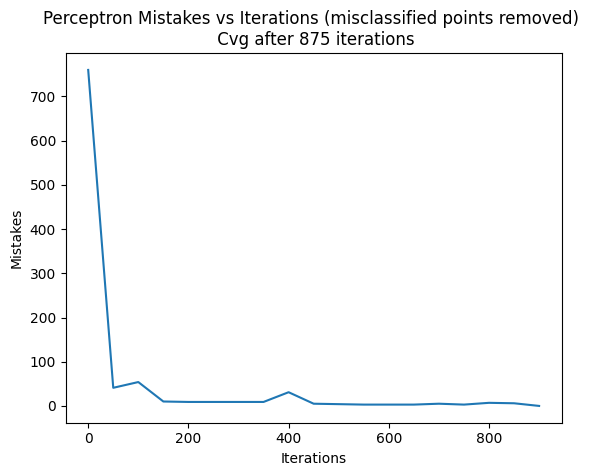

In [45]:
misclassified_indices = []
with open ('inseparable_23607.csv', 'r') as f:
    for line in f:
        misclassified_indices = line.split(',')
    
# remove misclassified indices from the train data
misclassified_indices = np.array([int(idx) for idx in misclassified_indices if idx != ''])
ls_X = np.delete(train_data, misclassified_indices, axis=0)
ls_y = np.delete(train_labels, misclassified_indices)

iters = [i*50 for i in range(19)]
mistakes_train = []
for max_iter in iters:
    w, _, _ = perceptron(ls_X, ls_y, max_iter)
    mistakes_train.append(mistakes_perceptron(w, ls_X, ls_y))

plt.plot(iters, mistakes_train)
plt.xlabel('Iterations')
plt.ylabel('Mistakes')
plt.title('Perceptron Mistakes vs Iterations (misclassified points removed) \n Cvg after 875 iterations')
plt.show()